In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
train_data0 = np.load('./Data/data0.npy')
train_lab0 = np.load('./Label/lab0.npy')

train_data1 = np.load('./Data/data1.npy')
train_lab1 = np.load('./Label/lab1.npy')

train_data2 = np.load('./Data/data2.npy')
train_lab2 = np.load('./Label/lab2.npy')

In [3]:
train_data = np.vstack((train_data0, train_data1, train_data2))
train_lab = np.hstack((train_lab0, train_lab1, train_lab2))

In [4]:
print(train_data.shape, train_lab.shape)

(30000, 40, 168) (30000,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_lab, test_size=0.2, random_state=42)

In [7]:
img_rows = X_train.shape[1]
img_cols = X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24000, 40, 168, 1) (6000, 40, 168, 1) (24000,) (6000,)


1 15
2 18
3 19
4 26
5 25
6 14
7 10
8 23
9 19


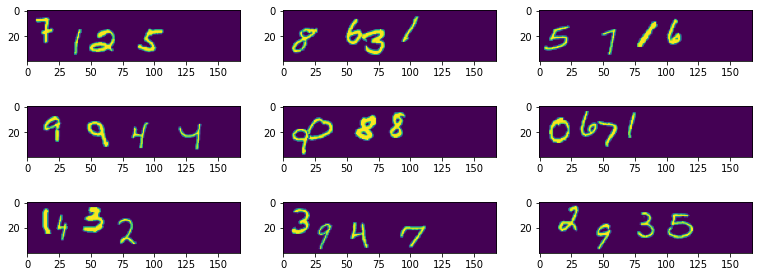

In [8]:
def visualize(images, labels, num_samples=9):

    fig, axes = plt.subplots(3,3, figsize=(13,5))
    for i,ax in enumerate(axes.flat):
        ax.imshow(images[i])
        print(i+1,labels[i]) 
        
visualize(X_test, y_test)

In [9]:
print(np.unique(y_train, return_counts=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36], dtype=uint8), array([   1,    8,   29,   42,  101,  172,  228,  308,  429,  575,  694,
        862, 1065, 1145, 1285, 1452, 1512, 1575, 1664, 1569, 1461, 1386,
       1260, 1093,  923,  872,  663,  507,  360,  271,  194,  126,   86,
         49,   25,    6,    2]))


In [10]:
#set number of categories
num_category = 37

In [11]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [2]:
##model building
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))
#categorical since we have multiple classes 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

NameError: name 'Sequential' is not defined